Please run `sh setup.sh` first

In [20]:
import cv2

from utils import show
from depth import get_depth

In [22]:
IMAGE_PATH = 'images/TLP.jpeg'

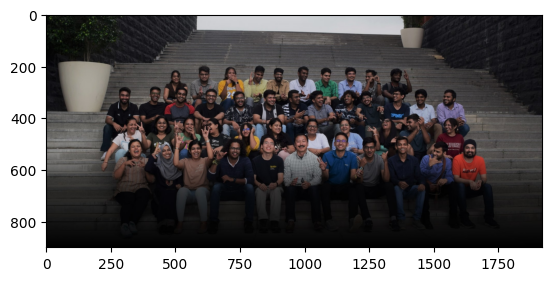

In [23]:
show(cv2.imread(IMAGE_PATH))

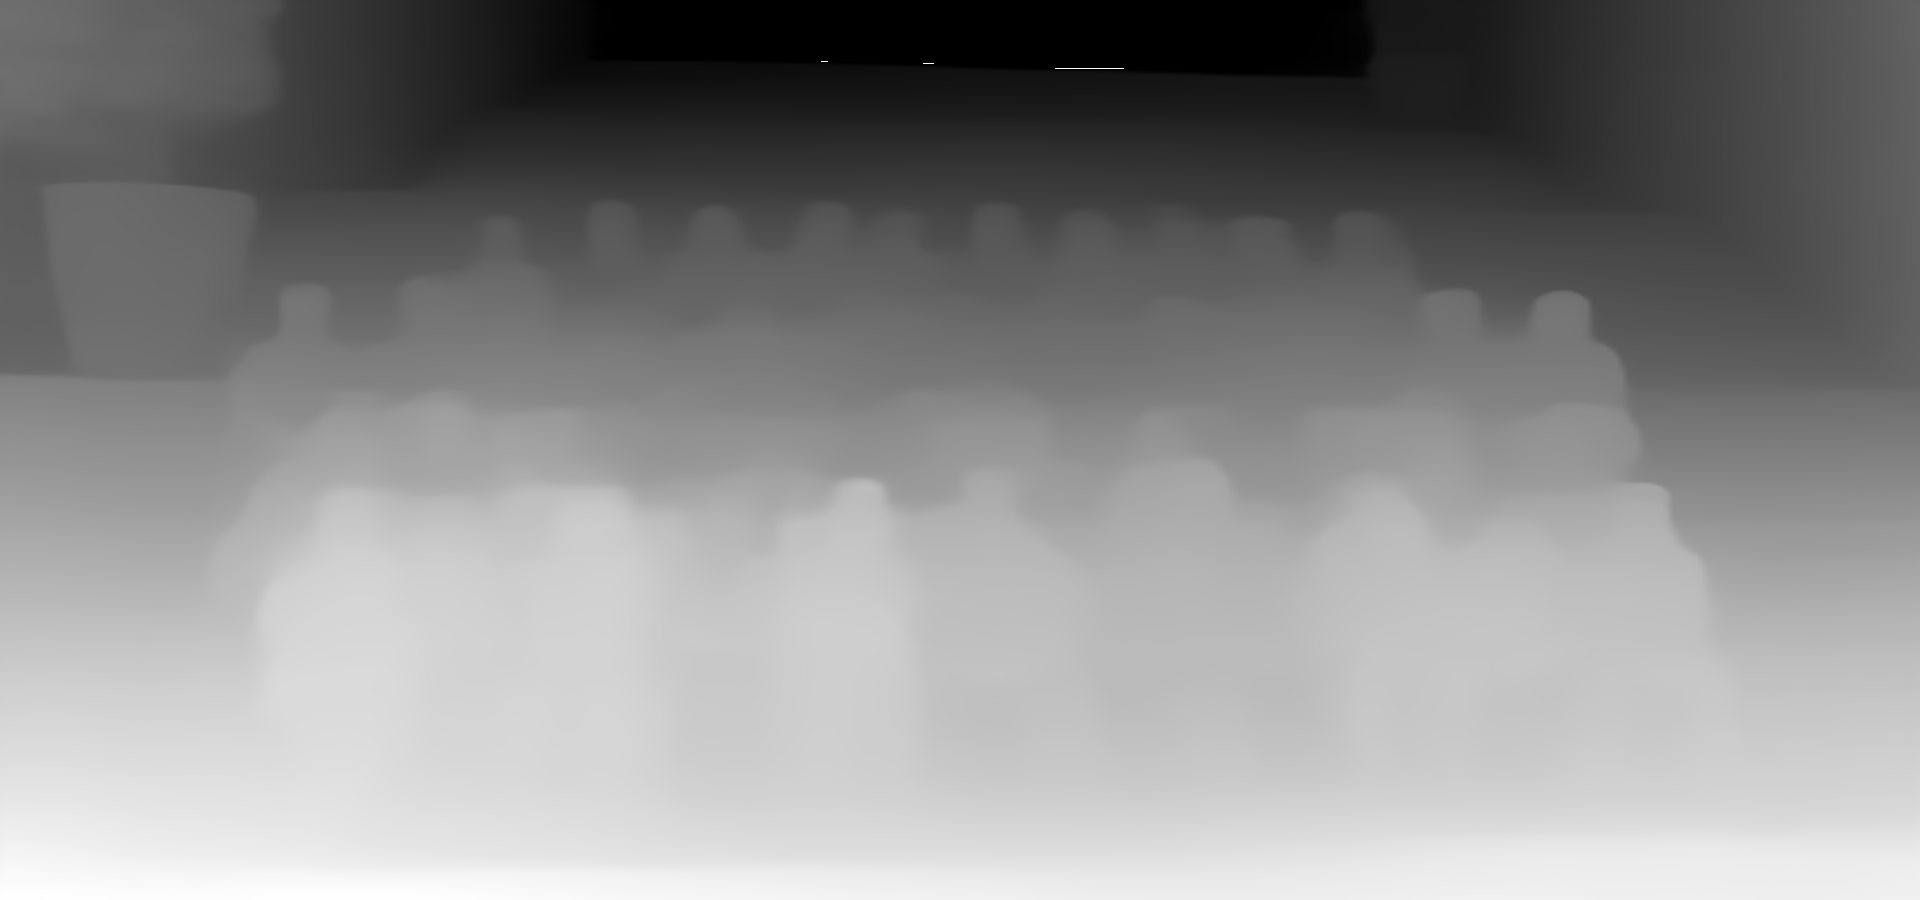

In [24]:
get_depth(IMAGE_PATH)

In [25]:
IMAGE_PATH = 'images/The-Last-Supper.jpg'

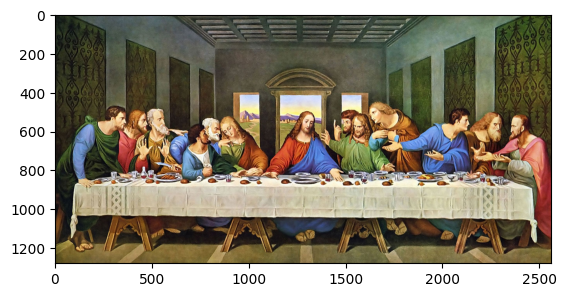

In [27]:
show(cv2.imread(IMAGE_PATH))

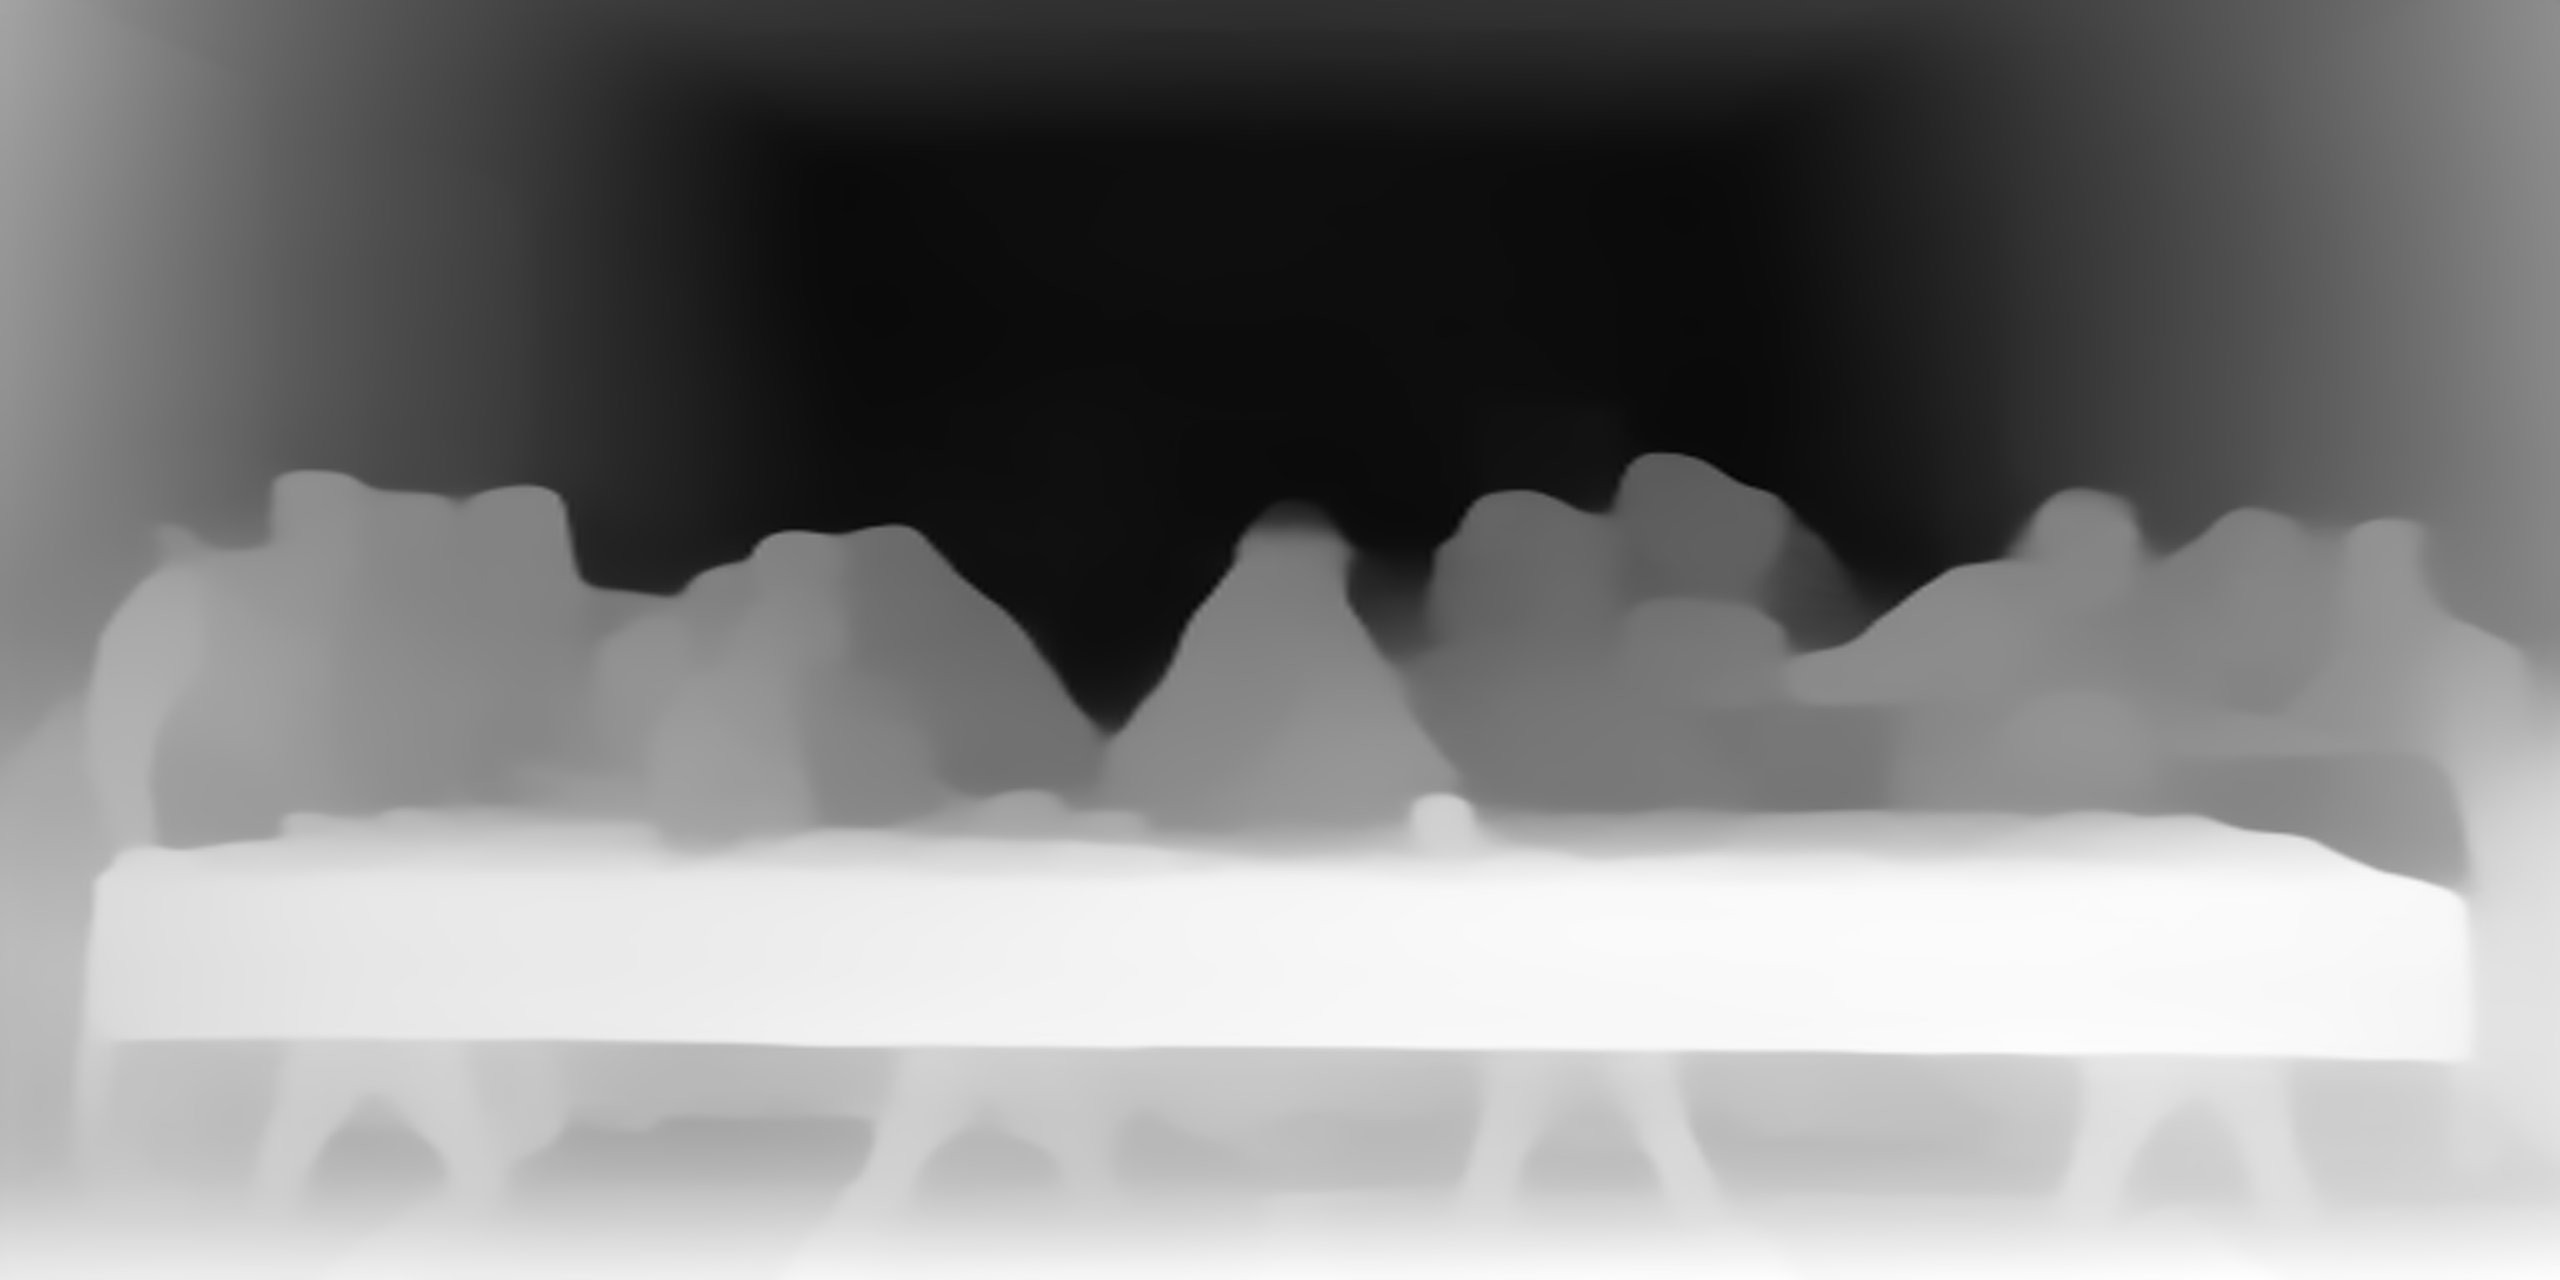

In [28]:
get_depth(IMAGE_PATH)